### **Sentiment Analysis of r/place 2023 Data**

Using Natural Language Processing to track how the Reddit community felt about the r/place social experiment on July 2023. In this Jupyter notebook, I will be using both the bertweet-sentiment-analysis model to determine whether a comment is positive, neutral, or negative.

First, we need to import the necessary libraries. I import the csv library to read comments stored in the CSV file, and the transformers library will used to create a pipeline for the bertweet-sentiment-analysis model.

### **Extracting Data**

In [27]:
import csv
import matplotlib.pyplot as plt
from transformers import pipeline
import random

First, we will extract comments from the CSV file and append them to a list.

In [3]:
# store the comments in a list
# each row has one comment
comments = []

# open the file storing reddit comments
# specify utf-8 encoding to prevent unicode decode error
filepath = "place_comments.csv"
with open(filepath, "r", encoding="utf-8") as f:
    skip = next(f)
    csv_reader = csv.reader(f)
    for row in csv_reader:
        comments.append(row[0])

Let's record how many comments we have prior to analyzing the results.

In [6]:
n = len(comments)
print(n)

8573


### **Creating the Pipeline**

Let's create a pipeline using the bertweet-sentiment-analysis model as mentioned before.

In [13]:
# run the BERT model on the imported comments
sentiment_pipeline = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


Sort the comments from positive, neutral, or negative by putting them in their appropriate lists. For each comment, we will check whether the label is positive, neutral, or negative and trim the comment down to 128 tokens if it's too big.

In [16]:
# sort the positive, neutral, and negative comments
pos_comments = []
neu_comments = []
neg_comments = []

# for each comment, determine whether the model identifies it as pos/neu/neg
# keep up to TOKEN_SIZE tokens or the pipeline will crash
TOKEN_SIZE = 128
for comment in comments:
    result = sentiment_pipeline(comment[:TOKEN_SIZE])
    label = result[0]["label"]

    if label == "POS":
        pos_comments.append(comment)
    elif label == "NEU":
        neu_comments.append(comment)
    else:
        neg_comments.append(comment)

### **Visualizing the Results**

Now that we've sorted between positive, neutral, and negative comments, let's graph the results using a pie chart.

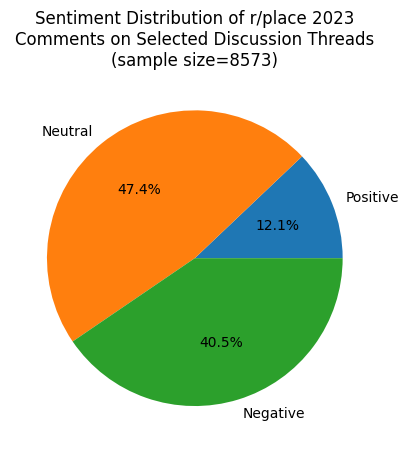

In [25]:
# find the labels and the sizes of each comment category
labels = ["Positive", "Neutral", "Negative"]
sizes = [len(pos_comments), len(neu_comments), len(neg_comments)]

# plot the results
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title(f"Sentiment Distribution of r/place 2023\nComments on Selected Discussion Threads\n(sample size={n})")
plt.show()

In [36]:
print("Number of positive comments: ", len(pos_comments))
print("Number of neutral  comments: ", len(neu_comments))
print("Number of negative comments: ", len(neg_comments))

Number of positive comments:  1036
Number of neutral  comments:  4067
Number of negative comments:  3470


### **Analyzing the Results**

The model reports that an astounding 47.4% of the comments are neutral, while 40.5% of the comments are negative! In contrast, only 12.1% of the comments are positive. This suggests that the general sentiment of the r/place 2023 was generally negative!

You can evaluate the model's accuracy based on random comments can be selected from the list.

In [37]:
print(random.choice(pos_comments))
print(random.choice(neu_comments))
print(random.choice(neg_comments))

I love that you added both a Dutch and Flemish way to insult Spez.
Does anyone have a badge yet? It probably takes a few days.
Oh, bro, you better go to sleep. Every hour it seems that it is not worth the time.


### **Room for Improvement**

As stated previously in the data visualization notebook, German comments may be difficult for many NLP models to evaluate, as they have been trained with English text. In future versions of this analysis project, I plan on separating English and German comments, and letting a German-based NLP model evaluate the German comments.

### **Credits**

This Jupyter notebook makes great use of the bertweet-sentiment-analysis model found at https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis. Thank you to Juan Manuel Pérez (github: finiteautomata) for creating this model and publishing it on huggingface.co.

The matplotlib documentation was used to create the pie model visualization. Source: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html